# Exercise 08.1-2 # 

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
plt.rcParams['figure.figsize'] = [9.5, 6]

## Minimization of the ground state energy ##

As a model for the ground state wave function it is selected $$\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+e^{-\frac{(x+\mu)^2}{2\sigma^2}}$$

First the code is used to find the parameters $\mu$ (mean) and $\sigma$ (standard variation) which minimize $\langle H \rangle_T$.

Starting the minimization from $\mu=0.8, \sigma =0.6$, for every set of the parameters the code computes the expectation value of the hamiltonian sampling $200$ Metropolis moves for $50$ blocks.
At every step one of the parameters is choosen with equal probability and changed adding a quantity $\delta \cdot \mathcal{U}(-1,1)$. A new expectation value for $\langle H \rangle_{new}$ is computed and the the set of parameters is accepted if $\langle H \rangle_{new} < \langle H \rangle_{old}$. Every time a random move is accepted the variation $\delta$ is divided by $1.25$ (initial value $\delta =1$). 

After $400$ variational steps the following optimal values are found:
- $\mu = 0.794539$
- $\sigma = 0.648469$
- $\langle H \rangle = -0.423466 \pm 0.00752175$

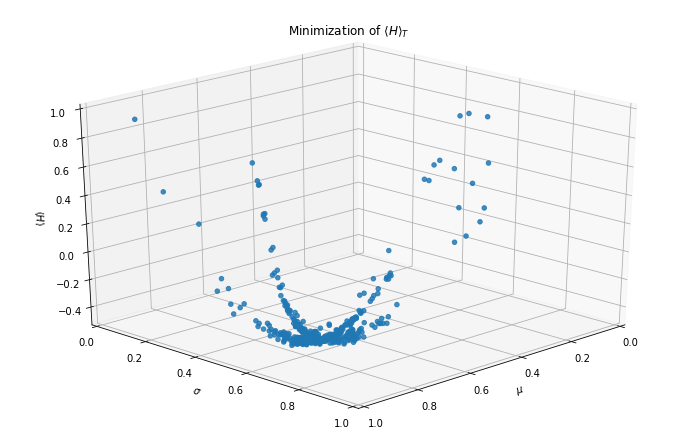

In [3]:
mean_var, sigma_var, energy_var, err_var = np.loadtxt("./results/varMC/output.var.0", usecols=(1,2,3,4), unpack='true')

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(mean_var, sigma_var, energy_var)
ax.set_xlim3d(0, 1)
ax.set_ylim3d(0, 1)
ax.set_zlim3d(-0.5, 1)
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\sigma$')
ax.set_zlabel(r'$\langle H \rangle$')
ax.view_init(25, 45)
plt.title(r'Minimization of $\langle H \rangle_T$')
plt.show()


## Variational Monte Carlo ##

For the set of parameters which minimize $\langle H \rangle_T$, a new Metropolis sampling is carried out for $200$ blocks of $1000$ steps.  

The total energy is shown as a function of the number of blocks; an histrogram is filled with the position of the sampled points, compared with the analytic curve of $p(x)=\frac{|\Psi_T(x)|^2}{Normalization}$ and with the approximate numerical solution.

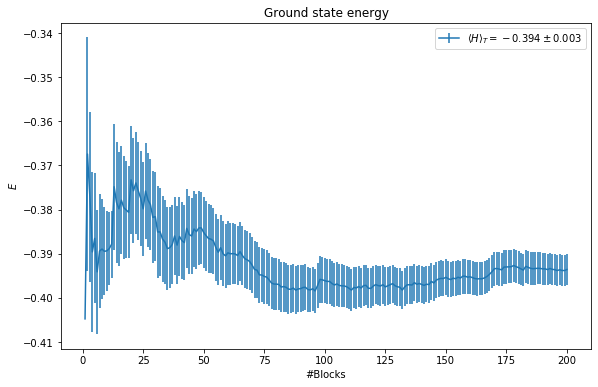

In [4]:
block, energy, err = np.loadtxt("./results/varMC/output.etot.0", usecols=(0,2,3), unpack='true')

plt.errorbar(block, energy, err, label =r'$\langle H \rangle_T = {0:.3f} \pm {1:.3f}$'.format(energy[-1], err[-1]))
plt.ylabel(r'$E$')
plt.xlabel('#Blocks')
plt.title('Ground state energy')
plt.legend()
plt.show()

In [5]:
#TRIAL WAVE FUNCTION
def psiT(x,m,s):
    return np.exp( -(x-m)**2/(2*s**2) ) + np.exp( -(x+m)**2/(2*s**2) )

In [6]:
#APPROXIMATE NUMERICAL SOLUTION
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

#print("1st excited state energy: ", E[1])
#print("2nd excited state energy: ", E[2])

# Plot a few things
#plt.figure(figsize=(8,5))
#scale = 0.3
#plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
#plt.plot(x,(psi[0])**2)
#plt.plot(x,(psi[1])**2)
#plt.plot(x,(psi[2])**2)

#plt.title("Potential & Probabilities")
#plt.xlabel("x")
#plt.grid(True)
#plt.xlim((-3,3))
#plt.ylim((-0.6, 1.5))
#plt.show()

In [7]:
pos_min = np.argmin(energy_var)
mean = mean_var[pos_min]
sigma = sigma_var[pos_min]

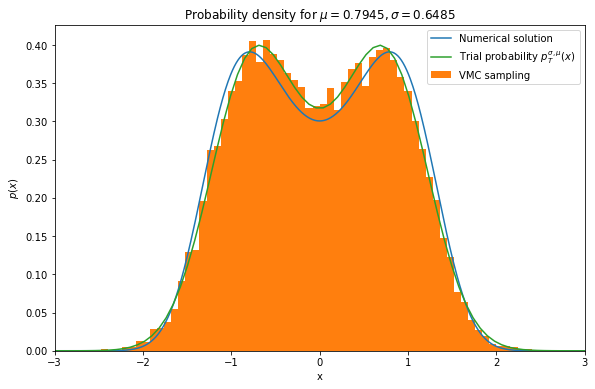

In [8]:
nbins = 100
bin_range = 4
x_f = np.linspace(-bin_range, bin_range, nbins)
dx_f = x_f[1]-x_f[0]

plt.plot(x,(psi[0])**2, label = 'Numerical solution')
x_sampled = np.loadtxt("./results/varMC/config.final", usecols=0, unpack='true')

density,bins, pathces = plt.hist(x_sampled, nbins, density='true', label='VMC sampling', range=(-bin_range,bin_range))

y_f = psiT(x_f, mean, sigma)**2
norm = np.sum(y_f*dx_f)

plt.plot(x_f, y_f/norm, label=r'Trial probability $p_T^{\sigma,\mu}(x)$')


plt.xlim(-3,3)
plt.ylabel('$p(x)$')
plt.xlabel('x')
plt.title(r'Probability density for $\mu = {0:.4f}, \sigma = {1:.4f}$'.format(mean, sigma) )
plt.legend()
plt.show()

# Exercise 08.3 #

## Path integral ground state ##

Simulation of the same quantum system with the PIGS code. Two different trial wave function are used: the previous product of gaussian functions ($\Psi_T^{\sigma,\mu}(x)$) and a constant function ($\Psi_T(x)=1$).

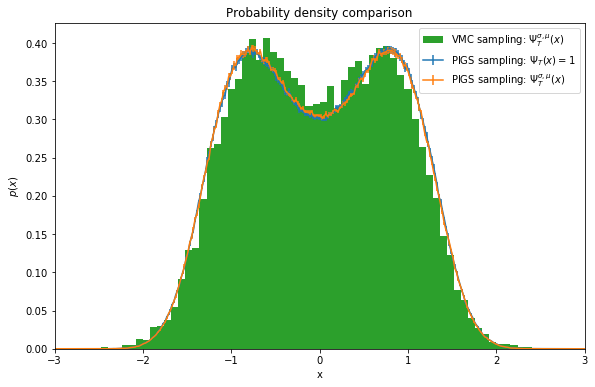

In [9]:
x_pigs_const, p_pigs_const, err_pigs_const = np.loadtxt("./results/pigs/psi_const/probability.dat", usecols=(0,1,2), unpack='true')
x_pigs_gauss, p_pigs_gauss, err_pigs_gauss = np.loadtxt("./results/pigs/psi_gauss/probability.dat", usecols=(0,1,2), unpack='true')

plt.errorbar(x_pigs_const, p_pigs_const, err_pigs_const, label= 'PIGS sampling: $\Psi_T(x)=1$')
plt.errorbar(x_pigs_gauss, p_pigs_gauss, err_pigs_gauss, label= 'PIGS sampling: $\Psi_T^{\sigma,\mu}(x)$')

density,bins, pathces = plt.hist(x_sampled, nbins, density='true', label='VMC sampling: $\Psi_T^{\sigma,\mu}(x)$', range=(-bin_range,bin_range))

plt.xlim(-3,3)
plt.ylabel('$p(x)$')
plt.xlabel('x')
plt.title(r'Probability density comparison')
plt.legend();
plt.show()

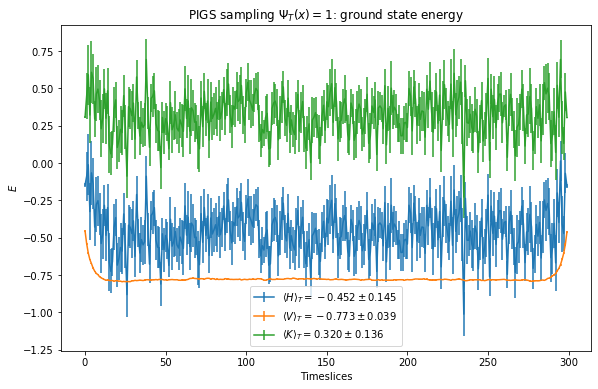

In [10]:
block_pigs_const, epot_pigs_const, err_epot_pigs_const = np.loadtxt("./results/pigs/psi_const/potential.dat", usecols=(0,1,2), unpack='true')
block_pigs_const, ekin_pigs_const, err_ekin_pigs_const = np.loadtxt("./results/pigs/psi_gauss/kinetic.dat", usecols=(0,1,2), unpack='true')

etot_pigs_const = np.average(ekin_pigs_const+epot_pigs_const)
err_etot_pigs_const = np.std(ekin_pigs_const+epot_pigs_const)
plt.errorbar(block_pigs_const, ekin_pigs_const+epot_pigs_const, err_epot_pigs_const+err_ekin_pigs_const, label=r'$\langle H \rangle_T = {0:.3f} \pm {1:.3f}$'.format(etot_pigs_const, err_etot_pigs_const))
plt.errorbar(block_pigs_const,epot_pigs_const, err_epot_pigs_const, label=r'$\langle V \rangle_T = {0:.3f} \pm {1:.3f}$'.format(np.average(epot_pigs_const), np.std(epot_pigs_const)))
plt.errorbar(block_pigs_const,ekin_pigs_const, err_ekin_pigs_const, label=r'$\langle K \rangle_T = {0:.3f} \pm {1:.3f}$'.format(np.average(ekin_pigs_const), np.std(ekin_pigs_const)))

plt.ylabel(r'$E$')
plt.xlabel('Timeslices')
plt.title('PIGS sampling $\Psi_T(x)=1$: ground state energy')
plt.legend()
plt.show()

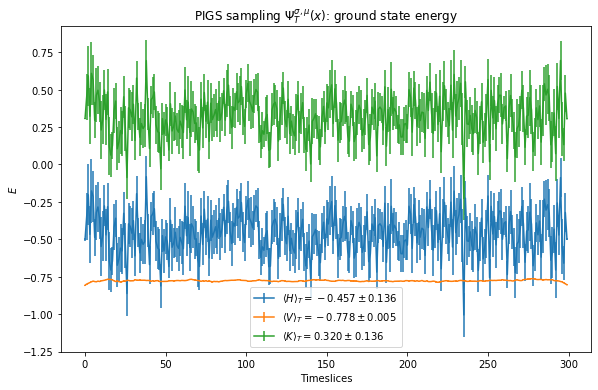

In [11]:
block_pigs_gauss, epot_pigs_gauss, err_epot_pigs_gauss = np.loadtxt("./results/pigs/psi_gauss/potential.dat", usecols=(0,1,2), unpack='true')
block_pigs_gauss, ekin_pigs_gauss, err_ekin_pigs_gauss = np.loadtxt("./results/pigs/psi_gauss/kinetic.dat", usecols=(0,1,2), unpack='true')

etot_pigs_gauss = np.average(ekin_pigs_gauss+epot_pigs_gauss)
err_etot_pigs_gauss = np.std(ekin_pigs_gauss+epot_pigs_gauss)
plt.errorbar(block_pigs_gauss, ekin_pigs_gauss+epot_pigs_gauss, err_epot_pigs_gauss+err_ekin_pigs_gauss, label=r'$\langle H \rangle_T = {0:.3f} \pm {1:.3f}$'.format(etot_pigs_gauss, err_etot_pigs_gauss))
plt.errorbar(block_pigs_gauss,epot_pigs_gauss, err_epot_pigs_gauss, label=r'$\langle V \rangle_T = {0:.3f} \pm {1:.3f}$'.format(np.average(epot_pigs_gauss), np.std(epot_pigs_gauss)))
plt.errorbar(block_pigs_gauss,ekin_pigs_gauss, err_ekin_pigs_gauss, label=r'$\langle K \rangle_T = {0:.3f} \pm {1:.3f}$'.format(np.average(ekin_pigs_gauss), np.std(ekin_pigs_gauss)))


plt.ylabel(r'$E$')
plt.xlabel('Timeslices')
plt.title('PIGS sampling $\Psi_T^{\sigma,\mu}(x)$: ground state energy')
plt.legend()
plt.show()

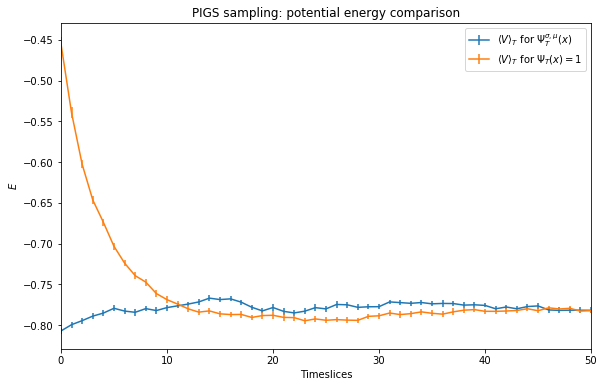

In [12]:
plt.errorbar(block_pigs_gauss,epot_pigs_gauss, err_epot_pigs_gauss, label=r'$\langle V \rangle_T$ for $\Psi_T^{\sigma,\mu}(x)$')
plt.errorbar(block_pigs_const,epot_pigs_const, err_epot_pigs_const, label=r'$\langle V \rangle_T$ for $\Psi_T(x)=1$')

plt.ylabel(r'$E$')
plt.xlabel('Timeslices')
plt.title('PIGS sampling: potential energy comparison')
plt.xlim(0,50)
plt.legend()
plt.show()

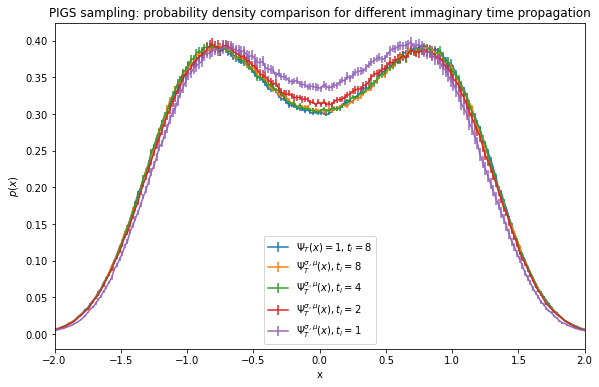

In [13]:
x_pigs_gauss4, p_pigs_gauss4, err_pigs_gauss4 = np.loadtxt("./results/pigs/psi_gauss4/probability.dat", usecols=(0,1,2), unpack='true')
x_pigs_gauss1, p_pigs_gauss1, err_pigs_gauss1 = np.loadtxt("./results/pigs/psi_gauss1/probability.dat", usecols=(0,1,2), unpack='true')
x_pigs_gauss2, p_pigs_gauss2, err_pigs_gauss2 = np.loadtxt("./results/pigs/psi_gauss2/probability.dat", usecols=(0,1,2), unpack='true')

plt.errorbar(x_pigs_const, p_pigs_const, err_pigs_const, label= '$\Psi_T(x)=1, t_i =8$')
plt.errorbar(x_pigs_gauss, p_pigs_gauss, err_pigs_gauss, label= '$\Psi_T^{\sigma,\mu}(x), t_i=8$')
plt.errorbar(x_pigs_gauss4, p_pigs_gauss4, err_pigs_gauss4, label= '$\Psi_T^{\sigma,\mu}(x), t_i=4$')
plt.errorbar(x_pigs_gauss2, p_pigs_gauss2, err_pigs_gauss2, label= '$\Psi_T^{\sigma,\mu}(x), t_i=2$')
plt.errorbar(x_pigs_gauss1, p_pigs_gauss1, err_pigs_gauss1, label= '$\Psi_T^{\sigma,\mu}(x), t_i=1$')

plt.xlim(-2,2)
plt.ylabel('$p(x)$')
plt.xlabel('x')
plt.title(r'PIGS sampling: probability density comparison for different immaginary time propagation')
plt.legend();
plt.show()

## Path Integral Monte Carlo ##

PIMC sampling of the above quantum system for different temperatures: immaginary time propagation is set to 8.

We can notice that as we raise the temperature the minimum of the distribution becomes lower and the two simmetric maximuma, higher.

However, this trend is not respected by the distribution for $T=2$. This may be due to the increasing of the acceptance rates. The parameters of the random moves, in fact, were not changed on varying $T$ and as a consequence, the acceptance rates grows.

- delta_translation = 1.8, brownianBridgeReconstructions = 20, brownianBridgeAttempts = 4

| T  | Translation | Brownian Bridge |
|:--:|:-----------:|:---------------:|
|0.25| 0.330305    | 0.485576        |
|0.50| 0.441415    | 0.684305        |
|0.75| 0.501000    | 0.778652        |
|1.00| 0.539720    | 0.833732        |
|2.00| 0.833732    | 0.917171        |

Modifying the parameters to get proper acceptances, the trend mentioned above is then respected for $T=2$ as well (line $T=2$ *  in the graph below).
- delta_translation = 2,2, brownianBridgeReconstructions = 100, brownianBridgeAttempts = 4

| T  | Translation | Brownian Bridge |
|:--:|:-----------:|:---------------:|
|2.00| 0.570951    | 0.589402       |

So, from this simulation, we conclude that acceptance rates do explicitly influence the results we get: but are we always guaranteed with the 0.5 rule?

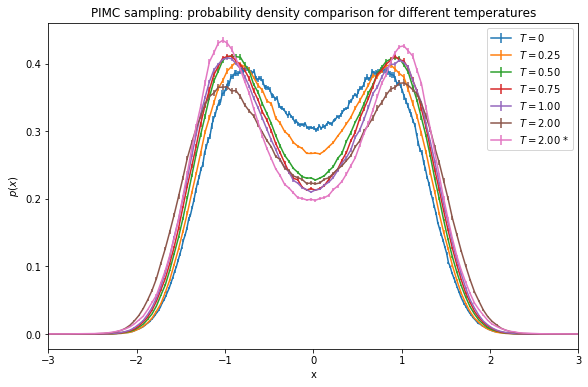

In [14]:
x_pimc_0_25, p_pimc_0_25, err_pimc_0_25 = np.loadtxt("./results/pimc/T_0.25/probability.dat", usecols=(0,1,2), unpack='true')
x_pimc_0_50, p_pimc_0_50, err_pimc_0_50 = np.loadtxt("./results/pimc/T_0.50/probability.dat", usecols=(0,1,2), unpack='true')
x_pimc_0_75, p_pimc_0_75, err_pimc_0_75 = np.loadtxt("./results/pimc/T_0.75/probability.dat", usecols=(0,1,2), unpack='true')
x_pimc_1_00, p_pimc_1_00, err_pimc_1_00 = np.loadtxt("./results/pimc/T_1.00/probability.dat", usecols=(0,1,2), unpack='true')
x_pimc_2_00, p_pimc_2_00, err_pimc_2_00 = np.loadtxt("./results/pimc/T_2.00/probability.dat", usecols=(0,1,2), unpack='true')
x_pimc_2_00b, p_pimc_2_00b, err_pimc_2_00b = np.loadtxt("./results/pimc/T_2.00b/probability.dat", usecols=(0,1,2), unpack='true')


plt.errorbar(x_pigs_gauss, p_pigs_gauss, err_pigs_gauss, label= '$T=0$')
plt.errorbar(x_pimc_0_25, p_pimc_0_25, err_pimc_0_25, label= '$T=0.25$')
plt.errorbar(x_pimc_0_50, p_pimc_0_50, err_pimc_0_50, label= '$T=0.50$')
plt.errorbar(x_pimc_0_75, p_pimc_0_75, err_pimc_0_75, label= '$T=0.75$')
plt.errorbar(x_pimc_1_00, p_pimc_1_00, err_pimc_1_00, label= '$T=1.00$')
plt.errorbar(x_pimc_2_00, p_pimc_2_00, err_pimc_2_00, label= '$T=2.00$')
plt.errorbar(x_pimc_2_00b, p_pimc_2_00b, err_pimc_2_00b, label= '$T=2.00$ *')

plt.xlim(-3,3)
plt.ylabel('$p(x)$')
plt.xlabel('x')
plt.title(r'PIMC sampling: probability density comparison for different temperatures')
plt.legend();
plt.show()